In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import imblearn
from imblearn.under_sampling import RandomUnderSampler 

from sklearn.model_selection import RandomizedSearchCV
#from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv("All_Data.csv")
df1 = pd.read_csv("Data_cb.csv")
data = df.copy()
data1 = df1.copy()
print(data.shape)
print(data1.shape)
#data1.info()
#print(data1.columns)
#data.info()
print(data.columns)

(24400, 24)
(119, 24)
Index(['user', 'deposit_attempts', 'sucess_deposit_attempts', 'num_cards',
       'num_cards_success', 'first_deposit', 'last_deposit',
       'deposit_sucess_ratio', 'deposit_time_delta', 'signup_time_delta',
       'calls', 'docs_uploaded', 'docs_approved', 'approval_rate',
       'sales_view', 'conversion_owner', 'sales_agent',
       'account_create_on_date', 'country_name', 'tag', 'channel',
       'ava_business', 'profile_state', 'num_closed_trade'],
      dtype='object')


 Create a new column 'IsFraud' and mark rows where ClientID is in df_fraud as 1, else 0

In [3]:
data['IsFraud'] = data['user'].isin(data1['user']).astype(int)
data["IsFraud"].sum()

119

Dealing with missing values - because there are no missing values for users who did frued and they a small number I will throw out the rows of missing values
in the rest of the data          

In [4]:
data = data.dropna()
df = data
data1.describe()
data[['num_cards','num_cards_success','num_closed_trade','approval_rate','calls','deposit_attempts','sales_view','IsFraud']].describe()

,num_cards,num_cards_success,num_closed_trade,approval_rate,calls,deposit_attempts,sales_view,IsFraud
count,24374.000000,24374.000000,24374.000000,24374.000000,24374.000000,24374.000000,24374.000000,24374.000000
mean,1.384795,1.166079,241.781078,0.699492,2.010257,5.134323,0.791991,0.004882
std,1.102769,0.548315,842.386382,0.309512,5.431941,11.797593,0.405891,0.069704
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,9.000000,0.500000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,54.000000,0.666667,1.000000,2.000000,1.000000,0.000000
75%,1.000000,1.000000,203.000000,1.000000,3.000000,5.000000,1.000000,0.000000
max,52.000000,15.000000,47058.000000,1.000000,319.000000,542.000000,1.000000,1.000000


In [5]:
data1.describe()

,user,deposit_attempts,sucess_deposit_attempts,num_cards,num_cards_success,deposit_sucess_ratio,deposit_time_delta,signup_time_delta,calls,docs_uploaded,docs_approved,approval_rate,sales_view,sales_agent,num_closed_trade
count,1.190000e+02,119.000000,119.00000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,1.498469e+07,15.260504,7.12605,3.831933,1.630252,0.542057,13.588235,40.705882,1.352941,2.529412,1.504202,0.589025,0.957983,0.336134,83.327731
std,6.516541e+05,19.153909,10.41475,4.764486,1.213383,0.255774,33.353884,178.729194,4.389101,2.673864,1.241063,0.421746,0.201476,0.474383,255.218122
min,1.076669e+07,1.000000,1.00000,1.000000,1.000000,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.470028e+07,4.000000,2.00000,1.000000,1.000000,0.333333,0.000000,0.000000,0.000000,1.000000,1.000000,0.138095,1.000000,0.000000,3.000000
50%,1.506627e+07,8.000000,4.00000,2.000000,1.000000,0.500000,1.000000,0.000000,0.000000,2.000000,2.000000,0.666667,1.000000,0.000000,9.000000
75%,1.541611e+07,17.000000,9.00000,4.000000,2.000000,0.715719,10.500000,6.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,35.000000
max,1.572772e+07,104.000000,72.00000,29.000000,9.000000,1.000000,223.000000,1503.000000,43.000000,15.000000,8.000000,1.000000,1.000000,1.000000,1622.000000


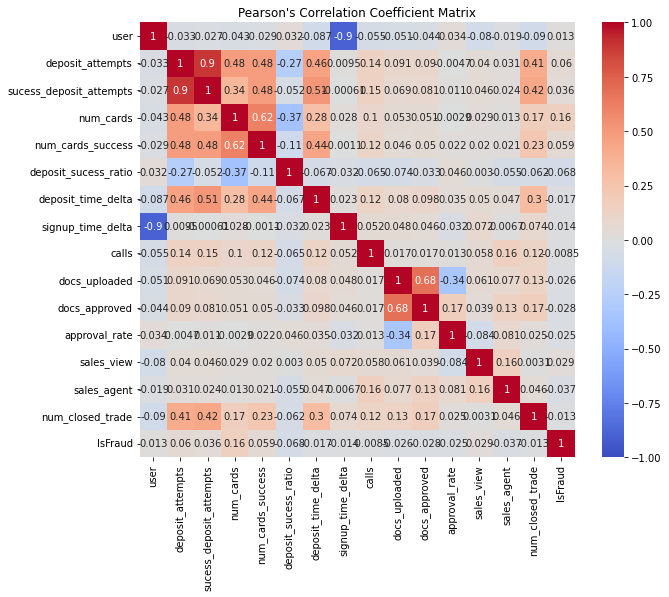

In [6]:

# Calculate the Pearson's correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Pearson's Correlation Coefficient Matrix")
plt.show()

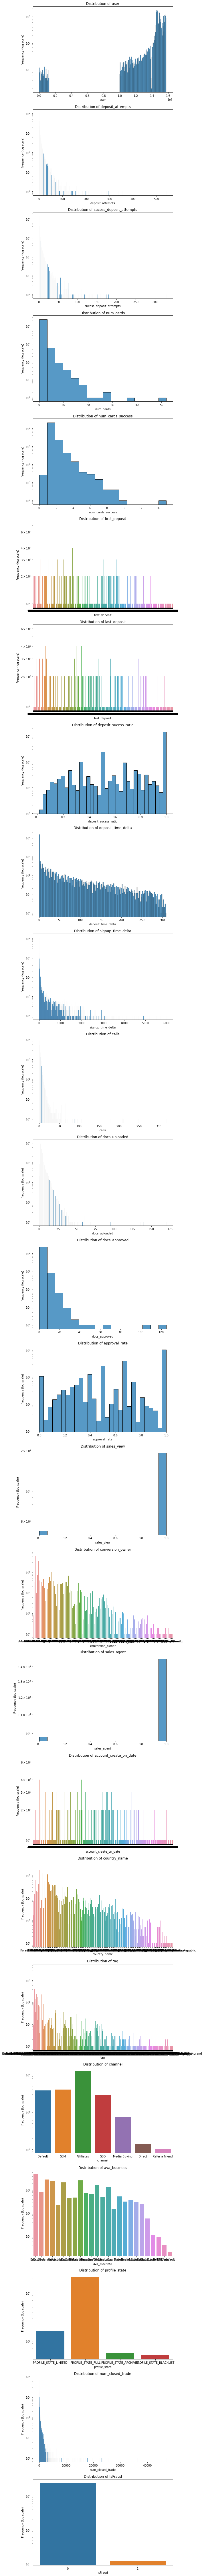

In [7]:
# Set the number of columns per row
columns_per_row = 1

# Calculate the number of required rows
num_rows = len(df.columns)

# Create subplots with one column per row
fig, axes = plt.subplots(nrows=num_rows, ncols=columns_per_row, figsize=(10, 5*num_rows))

# Plot histograms for numerical columns and bar plots for categorical columns
for i, column in enumerate(df.columns):
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        sns.histplot(data=df, x=column, kde=False, ax=axes[i])
        axes[i].set_yscale('log')  # Set log scale for y-axis
    else:
        sns.countplot(data=df, x=column, ax=axes[i])
        axes[i].set_yscale('log')  # Set log scale for y-axis
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency (log scale)')

plt.tight_layout()
plt.show()


 let's have a look at the class

<AxesSubplot:xlabel='IsFraud', ylabel='count'>

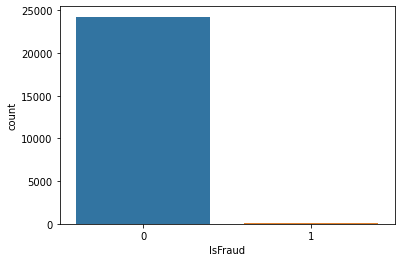

In [8]:
sns.countplot(x='IsFraud', data=df)

The dataset is highly imbalanced ! It's a big problem because classifiers will always predict the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one. To change that, I will proceed to random undersampling.

The simplest undersampling technique involves randomly selecting examples from the majority class and deleting them from the training dataset. This is referred to as random undersampling.

Although simple and effective, a limitation of this technique is that examples are removed without any concern for how useful or important they might be in determining the decision boundary between the classes. This means it is possible, or even likely, that useful information will be deleted.

In [9]:
undersample = RandomUnderSampler(sampling_strategy=0.5)

#print(df.columns)
cols = df.columns.tolist()
cols = [c for c in cols if c not in ['IsFraud']]
target = 'IsFraud'

#define X and Y
X = df[cols]
Y = df[target]

#undersample
X_under, Y_under = undersample.fit_resample(X, Y)

from pandas import DataFrame
test = pd.DataFrame(Y_under, columns = ['IsFraud'])

Text(0.5, 1.0, 'After')

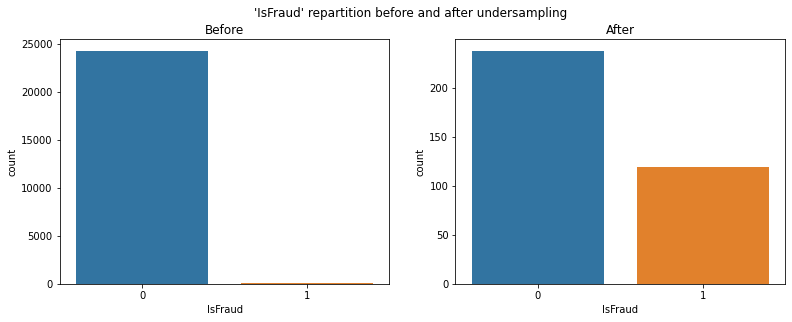

In [10]:
#visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="IsFraud", data=df, ax=axs[0])
sns.countplot(x='IsFraud', data=test, ax=axs[1])

fig.suptitle("'IsFraud' repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

In [11]:
Y_under = test
# Assuming you already have X_under and Y_under
X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=1)
y_train = y_train.astype('float64')

# Combine training and testing data for preprocessing
X_combined = pd.concat([X_train, X_test])

# Drop non-numeric columns for simplicity
X_numeric = X_combined.select_dtypes(include=['int64', 'float64'])

# Handle categorical data for combined data
categorical_columns = ['first_deposit', 'last_deposit', 'conversion_owner', 'account_create_on_date', 'country_name', 'tag', 'channel', 'ava_business', 'profile_state']
X_categorical = X_combined[categorical_columns]

# Perform one-hot encoding for categorical columns
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)

# Concatenate numerical and encoded categorical features for combined data
X_processed = pd.concat([X_numeric, X_categorical_encoded], axis=1)

# Standardize numerical features for combined data
scaler = StandardScaler()
X_processed[X_numeric.columns] = scaler.fit_transform(X_numeric)

# Convert all columns to float64
X_processed = X_processed.astype('float64')

# Split the data back into training and testing sets
X_processed_train = X_processed.iloc[:len(X_train)]
X_processed_test = X_processed.iloc[len(X_train):]

# Your X_train_processed and X_test_processed should be ready for training and testing, respectively


In [12]:
# f1 - score היפר פרמטרים לפי
# Define the function that creates the model
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(32, input_shape=(X_processed_train.shape[1],), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Define the parameter grid
param_grid = {
    'batch_size': [5,10, 20, 30,40],
    'epochs': [5, 10, 15,20],
    'optimizer': ['adam', 'rmsprop']
}

# Perform random search manually
best_score = 0
best_params = {}
for batch_size in param_grid['batch_size']:
    for epochs in param_grid['epochs']:
        for optimizer in param_grid['optimizer']:
            model = create_model(optimizer=optimizer)
            model.fit(X_processed_train.values, y_train.values, batch_size=batch_size, epochs=epochs, verbose=0)
            y_pred = model.predict(X_processed_train.values)
            score = f1_score(y_train.values, y_pred.round())
            if score > best_score:
                best_score = score
                best_params = {'batch_size': batch_size, 'epochs': epochs, 'optimizer': optimizer}

# Print the best parameters found
print("Best parameters found:")
print(best_params)


9/9 [==============================] - 0s 2ms/step
Best parameters found:
{'batch_size': 5, 'epochs': 15, 'optimizer': 'adam'}


2/2 [==============================] - 0s 7ms/step
Error: Index out of bounds for fpr and tpr arrays.


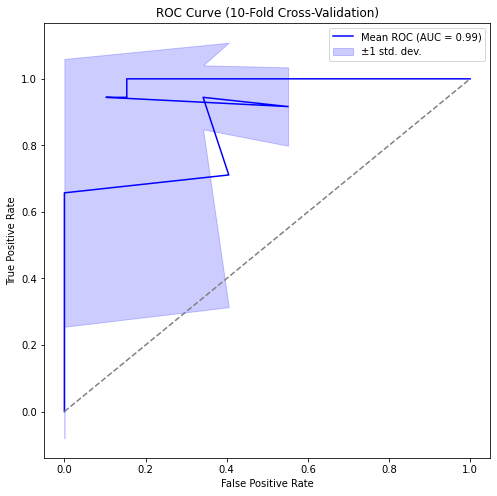

,mean,sd
TP,17.600,1.517
TN,38.400,0.548
FN,0.400,0.548
FP,0.600,1.342
Recall,0.967,0.075
Specificity,0.990,0.014
Precision,0.977,0.032
F1-score,0.971,0.051
Accuracy,0.982,0.030
AUC,0.993,0.016


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def draw_roc_curve_k_fold(tpr_list, fpr_list, auc, pred_threshold=0.5, fpr=None, tpr=None):
    mean_tpr = pd.DataFrame(tpr_list).mean()  
    mean_fpr = pd.DataFrame(fpr_list).mean() 
    std_tpr = pd.DataFrame(tpr_list).std()   
    std_fpr = pd.DataFrame(fpr_list).std() 
    
    # Calculate area under the curve (AUC)
    roc_auc = auc
    
    # Find the best threshold based on Youden's J statistic
    J = mean_tpr - mean_fpr
    ix = np.argmax(J)
    best_thresh = 0.5

    # Plot the ROC curve with shaded standard deviation regions
    plt.figure(figsize=(8, 8))
    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {roc_auc:.2f})')
    plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, color='b', alpha=0.2, label='±1 std. dev.')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (10-Fold Cross-Validation)')
    plt.legend()

    # Annotate the best threshold
    if fpr is not None and tpr is not None:
        if ix < len(fpr) and ix < len(tpr):
            plt.plot(fpr[ix], tpr[ix], color="red", marker="o", markersize=6)
            plt.annotate(
                f"Best Threshold={best_thresh:.2f}",
                xy=(fpr[ix], tpr[ix]),
                xytext=(fpr[ix] + 0.09, tpr[ix] - 0.18),
                arrowprops=dict(facecolor="black", shrink=0.15),
            )
        else:
            print("Error: Index out of bounds for fpr and tpr arrays.")

    plt.show()

def k_cross_validation_with_nn(X, y, k, pred_threshold=0.5):
    i = 0
    TP = []
    TN = []
    FP = []
    FN = []
    precision = []
    recall = []
    specificity = []
    f1 = []
    support = []
    accuracy = []
    AUC = []
    tpr_list = []
    fpr_list = []
    fpr = None
    tpr = None

    # Define the neural network model
    model = Sequential()
    model.add(Dense(32, input_shape=(X.shape[1],), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

    rskf = RepeatedStratifiedKFold(n_splits=k, n_repeats=1, random_state=78)
    for train_index, test_index in rskf.split(X, y):
        i = i + 1
        X_train, X_test = X.reset_index(drop=True).loc[train_index], X.reset_index(drop=True).loc[test_index]
        y_train, y_test = y.reset_index(drop=True).loc[train_index], y.reset_index(drop=True).loc[test_index]

        # Train the neural network model
        history = model.fit(X_train.values, y_train.values, epochs=15, batch_size=5, validation_split=0.15, verbose=0)

        # Evaluate the model
        y_probabilities = model.predict(X_test.values)
        threshold = 0.5
        y_pred = (y_probabilities >= threshold).astype(int)

        TP.append(confusion_matrix(y_test, y_pred)[1][1])
        TN.append(confusion_matrix(y_test, y_pred)[0][0])
        FN.append(confusion_matrix(y_test, y_pred)[0][1])
        FP.append(confusion_matrix(y_test, y_pred)[1][0])
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        specificity.append(recall_score(y_test, y_pred, pos_label=0))
        f1.append(f1_score(y_test, y_pred))
        accuracy.append(accuracy_score(y_test, y_pred))
        AUC.append(roc_auc_score(y_test, y_probabilities))
        fpr, tpr, _ = roc_curve(y_test, y_probabilities)
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    results = pd.DataFrame({"TP": TP, "TN": TN, "FN": FN, "FP": FP, "Recall": recall, "Specificity": specificity,
                            "Precision": precision, "F1-score": f1, "Accuracy": accuracy, "AUC": AUC})

    d = pd.DataFrame({"mean": results.mean().round(decimals=3), "sd": results.std().round(decimals=3)})

    draw_roc_curve_k_fold(tpr_list, fpr_list, d.loc['AUC', 'mean'], pred_threshold, fpr, tpr)
    return d

k_cross_validation_with_nn(X_processed_train, y_train, k=5,  pred_threshold=0.5)


Text(0.5, 0, 'Epochs')

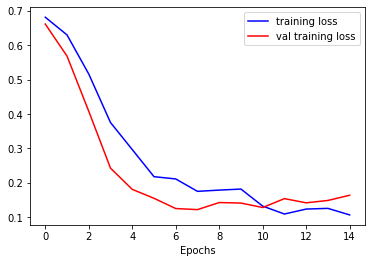

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf

# Assuming you have a binary classification problem
model = Sequential()
model.add(Dense(32, input_shape=(X_processed_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1, mode='auto', baseline=None, restore_best_weights=False)

history = model.fit(X_processed_train.values, y_train.values, epochs=15, batch_size=5, validation_split=0.15, verbose=0, callbacks=[earlystopper])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.plot(loss_values, 'b', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')
plt.legend()
plt.xlabel("Epochs")


Text(0.5, 0, 'Epochs')

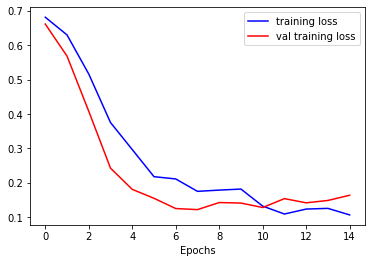

In [16]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

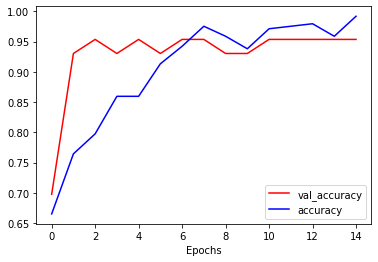

In [17]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

In [18]:
#predictions
y_pred_nn = model.predict(X_processed_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)


3/3 [==============================] - 0s 5ms/step


In [19]:
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred_nn:", np.unique(y_pred_nn))


Unique values in y_test: [0 1]
Unique values in y_pred_nn: [0 1]


In [20]:
#scores
print("Accuracy Neural Net:",metrics.accuracy_score(y_test, y_pred_nn))
print("Precision Neural Net:",metrics.precision_score(y_test, y_pred_nn))
print("Recall Neural Net:",metrics.recall_score(y_test, y_pred_nn))
print("F1 Score Neural Net:",metrics.f1_score(y_test, y_pred_nn))

Accuracy Neural Net: 0.9722222222222222
Precision Neural Net: 0.9642857142857143
Recall Neural Net: 0.9642857142857143
F1 Score Neural Net: 0.9642857142857143


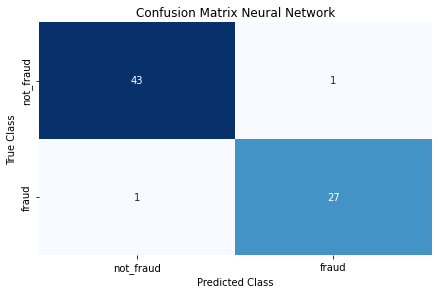

In [21]:
#CM matrix
matrix_nn = confusion_matrix(y_test, y_pred_nn)
cm_nn = pd.DataFrame(matrix_nn, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_nn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Neural Network"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [22]:
# Predict probabilities
y_pred_nn_proba = model.predict(X_processed_test)

# Calculate ROC curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_nn_proba)

# Calculate AUC
auc_keras = auc(fpr_keras, tpr_keras)

print('AUC Neural Net: ', auc_keras)


3/3 [==============================] - 0s 3ms/step
AUC Neural Net:  0.9805194805194806


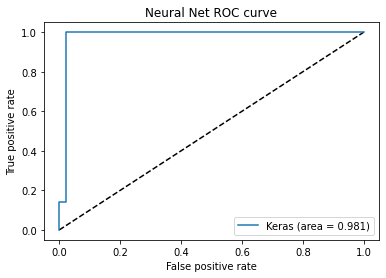

In [23]:
#ROC
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Neural Net ROC curve')
plt.legend(loc='best')
plt.show()

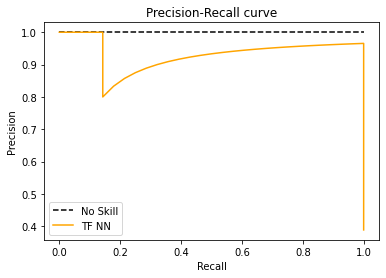

In [24]:
nn_precision, nn_recall, _ = precision_recall_curve(y_test, y_pred_nn_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(nn_recall, nn_precision, color='orange', label='TF NN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()